In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Loading data 
Reading data from files. 

The data saved as 10 variable from data0 to data9.

Using 70% of each one for train, named from **data0_train** to **data9_train**, 
and the rest for test, named **data0_test** to **data0_test**. 

Merge the train data as **data_train** and label them

In [2]:
for i in range(10):
    locals()['data%d'%i]= np.loadtxt('train.'+str(i)+'.txt',delimiter = ',')
from sklearn.cross_validation import train_test_split
for i in range(10):
    locals()['data%d_train'%i],locals()['data%d_test'%i],locals()['label%d_train'%i],locals()['label%d_test'%i] = train_test_split(
        locals()['data%d'%i], i*np.ones(locals()['data%d'%i].shape[0]), test_size = 0.3, random_state = 0)

In [3]:
data_train = np.zeros((1,256))
for i in range(10):
    data_train = np.append(data_train,locals()['data%d_train'%i],axis = 0)
train_data = data_train[1:,:]

train_label = [] 
for i in range(10):
    train_label = np.append(train_label, i * np.ones(locals()['data%d_train'%i].shape[0]))

## PCA to Reduce Dimension 
Using PCA to extract features from data set.

Notice the data is 16\*16 image. 

After PCA we get features from each data whose dimension is much less then 256. 


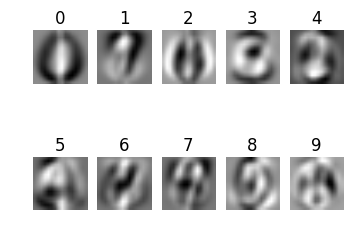

In [8]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline

logistic = linear_model.LogisticRegression()
num_components = 64
pca = decomposition.PCA(n_components=num_components)

X_digits = train_data
y_digits = train_label

pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(str(i))
    img = np.reshape(pca.components_[i,:],(16,16))
    imgshow = plt.imshow(img,cmap='gray')
    plt.axis('off')   #不显示坐标尺寸
    

X_digits_pca = np.dot(X_digits,np.transpose(pca.components_))



## Logistic Regression 

In [9]:
from sklearn.linear_model import LogisticRegression
digits = LogisticRegression(C=1000,random_state=0)
digits.fit(X_digits_pca,y_digits)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Confusion Matrix 

$A_{ij}$ means the number of the digits which the true label is $i$ but the predition is $j$. 

So the diagnoal elements of this matrix are the accurate prediction 

In [10]:
confusion_Matrix = np.zeros((10,10))

for i in range(10):
    data_i = np.dot(locals()['data%d_test'%i],np.transpose(pca.components_))
    
    decision = digits.decision_function(data_i)
    j = np.argmax(decision,axis=1)
    for k in range(j.shape[0]):
        confusion_Matrix[i,j[k]] += 1
print confusion_Matrix

[[ 348.    0.    3.    0.    1.    3.    2.    0.    2.    0.]
 [   0.  300.    0.    0.    0.    0.    0.    0.    2.    0.]
 [   0.    1.  210.    1.    4.    1.    0.    0.    3.    0.]
 [   2.    0.    4.  184.    0.    3.    0.    3.    2.    0.]
 [   1.    2.    3.    0.  177.    1.    2.    0.    4.    6.]
 [   1.    2.    4.    5.    3.  144.    4.    1.    2.    1.]
 [   1.    0.    1.    0.    1.    4.  191.    0.    2.    0.]
 [   0.    2.    1.    0.    1.    1.    0.  184.    1.    4.]
 [   1.    0.    7.    2.    3.    6.    1.    0.  143.    0.]
 [   0.    1.    0.    2.    4.    0.    0.    3.    6.  178.]]


In [11]:
total = np.sum(confusion_Matrix)
hit = 0
for i in range(10):
    hit += confusion_Matrix[i,i]
accuracy = hit/total.astype(float)
print accuracy 

0.938896488828


In [31]:
result = 0
logistic = linear_model.LogisticRegression()

for i in range(30,85,5):
    num_components = i
    pca = decomposition.PCA(n_components=num_components)

    X_digits = train_data
    y_digits = train_label

    pca.fit(X_digits)

    X_digits_pca = np.dot(X_digits,np.transpose(pca.components_))

    from sklearn.linear_model import LogisticRegression
    digits = LogisticRegression(C=1000,random_state=0)
    digits.fit(X_digits_pca,y_digits)

    confusion_Matrix = np.zeros((10,10))

    for l in range(10):
        data_i = np.dot(locals()['data%d_test'%l],np.transpose(pca.components_))
        decision = digits.decision_function(data_i)
        j = np.argmax(decision,axis=1)
        for k in range(j.shape[0]):
            confusion_Matrix[l,j[k]] += 1

    total = np.sum(confusion_Matrix)
    hit = 0
    for i in range(10):
        hit += confusion_Matrix[i,i]
    accuracy = hit/total.astype(float)
    result = np.append(result,accuracy)
result = result[1:]

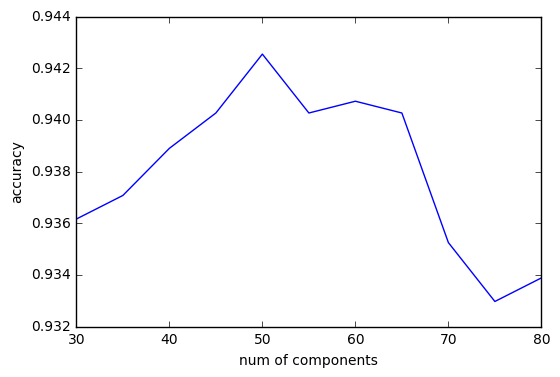

In [32]:
plt.plot(range(30,85,5),result)
plt.xlabel('num of components')
plt.ylabel('accuracy')
plt.savefig('log.jpg')

In [33]:
print result

[ 0.93616051  0.9370725   0.93889649  0.94026448  0.94254446  0.94026448
  0.94072047  0.94026448  0.93524852  0.93296854  0.93388053]
